In [1]:
%%time
from datetime import datetime
a = datetime.now()

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_palette("afmhot")
# sns.set_palette("twilight")
# sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":1.5})
sns.set_style("whitegrid")
import pylab
pylab.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')


CPU times: total: 1.84 s
Wall time: 2.01 s


In [2]:
%%time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Input, Activation
import tensorflow.keras as tfk

CPU times: total: 3.09 s
Wall time: 3.65 s


In [3]:
import sklearn.datasets
cancer=sklearn.datasets.load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
y = cancer['target']

df['classification'] = y
df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,classification
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


In [6]:
# 212 - Malignant ~ 0
# 357 - Benign ~ 1

In [7]:
df['classification']= df['classification'].apply(lambda x : 1 if x==0 else 0)

<AxesSubplot:xlabel='classification', ylabel='count'>

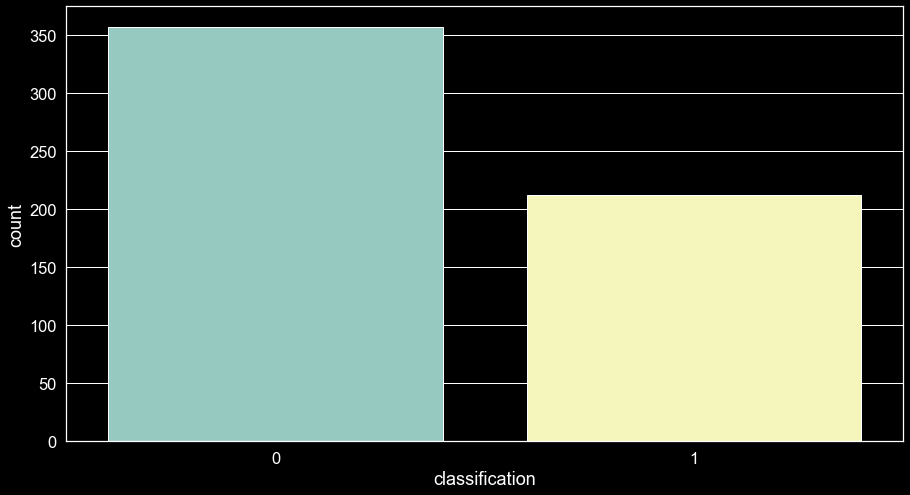

In [8]:
sns.countplot(data=df, x=df['classification'])

In [9]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()

In [10]:
target='classification'
y=df[target].values
# X = df.loc[df.columns != target]
X = df.loc[:,df.columns != target].values


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=318)

In [12]:
len(X_train), len(y_test)

(426, 143)

In [13]:
from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [14]:
model = Sequential()

In [15]:
model.add(Dense(128, input_dim=30, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
%%time
history=model.fit(X_train,y_train, epochs=700,validation_data=(X_test,y_test),verbose=0)

CPU times: total: 1min 12s
Wall time: 54.3 s


In [19]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,10.832312,0.492958,2.088508,0.433566
1,1.771803,0.725352,2.036558,0.797203
2,0.782607,0.854460,0.207826,0.923077
3,0.358278,0.908451,0.155962,0.944056
4,0.370245,0.892019,0.506944,0.888112
...,...,...,...,...
695,0.068617,0.974178,0.056388,0.979021
696,0.102453,0.957747,0.059571,0.965035
697,0.066108,0.969484,0.193629,0.937063
698,0.104229,0.962441,0.073414,0.965035


In [20]:
hist = model.history.history

In [21]:
pd.DataFrame(hist)

,loss,accuracy,val_loss,val_accuracy
0,10.832312,0.492958,2.088508,0.433566
1,1.771803,0.725352,2.036558,0.797203
2,0.782607,0.854460,0.207826,0.923077
3,0.358278,0.908451,0.155962,0.944056
4,0.370245,0.892019,0.506944,0.888112
...,...,...,...,...
695,0.068617,0.974178,0.056388,0.979021
696,0.102453,0.957747,0.059571,0.965035
697,0.066108,0.969484,0.193629,0.937063
698,0.104229,0.962441,0.073414,0.965035


In [22]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.1428 - accuracy: 0.9441


[0.14278239011764526, 0.9440559148788452]

<AxesSubplot:>

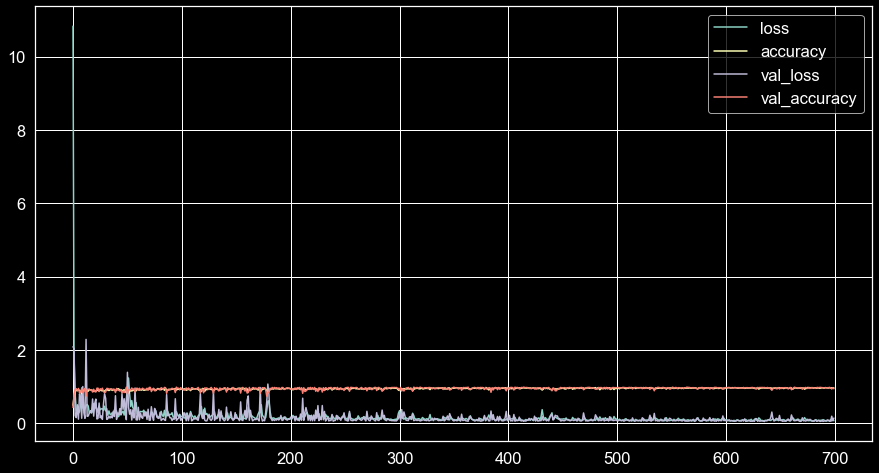

In [23]:
pd.DataFrame(hist).plot()

<AxesSubplot:>

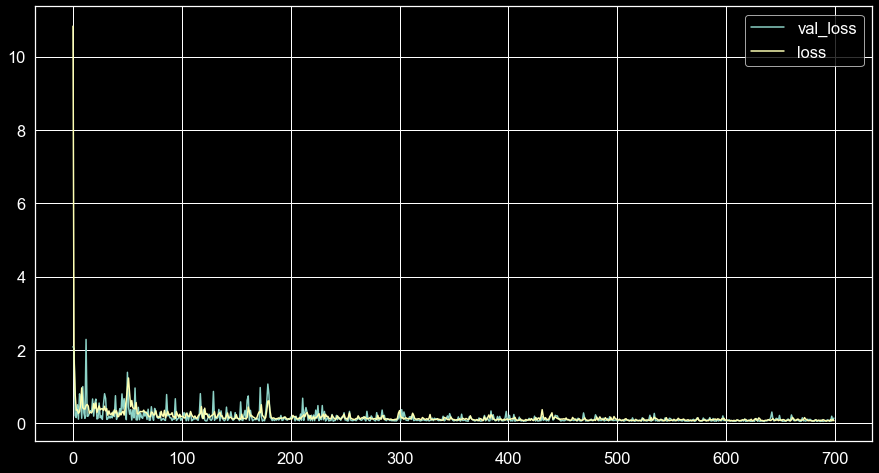

In [24]:
pd.DataFrame(hist)[['val_loss','loss']].plot()

<AxesSubplot:>

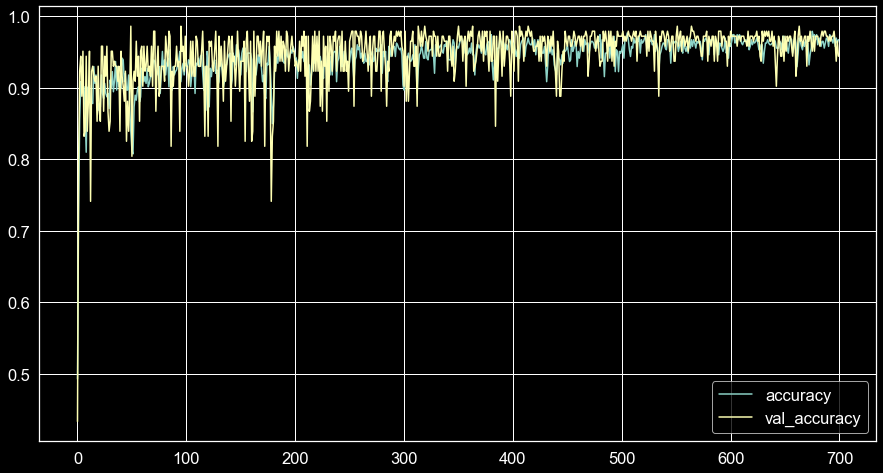

In [25]:
pd.DataFrame(hist)[['accuracy','val_accuracy']].plot()

In [26]:
pred = model.predict(X_test)

In [27]:
final = pd.DataFrame(pred, columns=['logit'])

In [28]:
final['binary']=final['logit'].apply(lambda x:1 if x>=0.50 else 0)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print(classification_report(y_test,final['binary'].values))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        82
           1       1.00      0.87      0.93        61

    accuracy                           0.94       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.94      0.94       143



<AxesSubplot:>

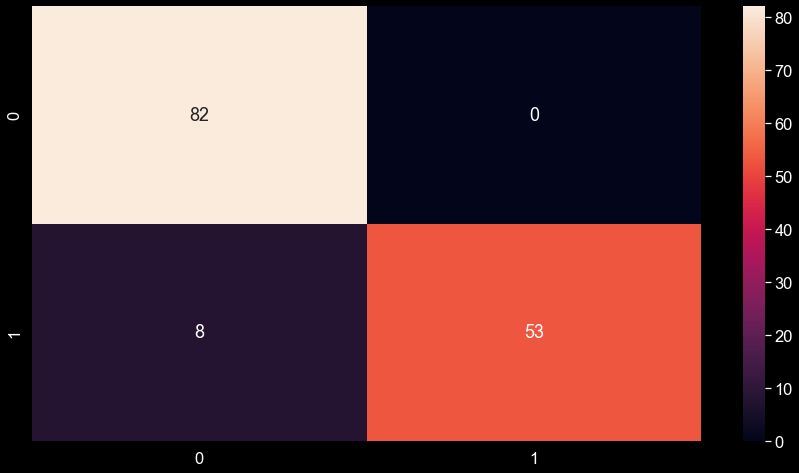

In [31]:
cm=confusion_matrix(y_test,final.binary)
sns.heatmap(cm,annot=True)

In [32]:
print(datetime.now() - a)

0:01:02.701460
